# Prüfungsleistung Data Librarianship

In [1]:
# Import der - vermutlich - nötigen libraries
import pandas as pd
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Der zu Grunde liegende Datensatz ist ein Auszug der Checkouts der Seattle Library aus dem Jahr 2018, limitier auf 10000 Zeilen.

In [2]:
# Setzen der Variablen url und checkout_file
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&$limit=10000"

In [3]:
checkout_file = "checkouts.csv"

In [4]:

urllib.request.urlretrieve(url, checkout_file)

('checkouts.csv', <http.client.HTTPMessage at 0x1852f507400>)

In [5]:
checkouts_list = pd.read_csv(checkout_file)

In [6]:
checkouts_list

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,EBOOK,2018,1,22,Enemy of the State,NaN,Vince Flynn,"Fiction, Literature, Thriller","Simon & Schuster, Inc.",2017
1,Digital,Hoopla,TELEVISION,2018,1,1,Newspaper Mom / Cucumber in Rio / Donut Raffle,NaN,NaN,Children's,DHX Media,NaN
2,Physical,Horizon,SOUNDDISC,2018,1,1,Mono / the Mavericks.,NaN,Mavericks (Musical group),Country music 2011 2020,"Valory,",[2015]
3,Digital,OverDrive,EBOOK,2018,1,2,Anna Karenina,NaN,Leo Tolstoy,"Classic Literature, Fiction, Literature","Penguin Group (USA), Inc.",2009
4,Digital,OverDrive,EBOOK,2018,1,1,"Dragon: Vlad Series, Book 8",NaN,Steven Brust,"Fantasy, Fiction",Macmillan Publishers,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Digital,OverDrive,AUDIOBOOK,2018,1,1,Cooking for Picasso: A Novel (unabridged) (Una...,NaN,Camille Aubray,"Fiction, Historical Fiction, Literature",Books on Tape,2016
9996,Digital,OverDrive,EBOOK,2018,1,1,The Book of Summer: A Novel,NaN,Michelle Gable,"Fiction, Historical Fiction, Literature",Macmillan Publishers,2017
9997,Physical,Horizon,BOOK,2018,1,1,Revival / Stephen King.,NaN,"King, Stephen, 1947-","Drug addicts Fiction, Clergy Fiction, Rock mus...","Thorndike Press,",2014.
9998,Physical,Horizon,BOOK,2018,1,4,Loula is leaving for Africa / written and illu...,NaN,"Villeneuve, Anne, 1966-","Imagination Juvenile fiction, Chauffeurs Juven...","Kids Can Press,",[2013]


## Frage 1
Wie häufig werden Medien im Schnitt ausgeliehen? Wie sieht die Verteilung aus?

In [7]:
print(checkouts_list)

     usageclass checkouttype materialtype  checkoutyear  checkoutmonth  \
0       Digital    OverDrive        EBOOK          2018              1   
1       Digital       Hoopla   TELEVISION          2018              1   
2      Physical      Horizon    SOUNDDISC          2018              1   
3       Digital    OverDrive        EBOOK          2018              1   
4       Digital    OverDrive        EBOOK          2018              1   
...         ...          ...          ...           ...            ...   
9995    Digital    OverDrive    AUDIOBOOK          2018              1   
9996    Digital    OverDrive        EBOOK          2018              1   
9997   Physical      Horizon         BOOK          2018              1   
9998   Physical      Horizon         BOOK          2018              1   
9999    Digital    OverDrive    AUDIOBOOK          2018              1   

      checkouts                                              title  isbn  \
0            22                    

Um Frage 1 zu beantworten, muss die Spale "checkouts" ausgelesen werden, die die Anzahl der Ausleihen im Jahr 2018 für jedes einzelne Medium anzeigt.

In [8]:
checkouts_list["checkouts"]

0       22
1        1
2        1
3        2
4        1
        ..
9995     1
9996     1
9997     1
9998     4
9999     1
Name: checkouts, Length: 10000, dtype: int64

In [9]:
# Zeigt den geringsten Wert für checkouts an.
checkouts_list["checkouts"].min()

1

In [10]:
# Zeigt den höchsten Wert für checkouts an.
checkouts_list["checkouts"].max()

540

Die Medien des augewählen Bereichs werden also zwischen 1 und 540 Mal ausgeliehen.

<AxesSubplot:>

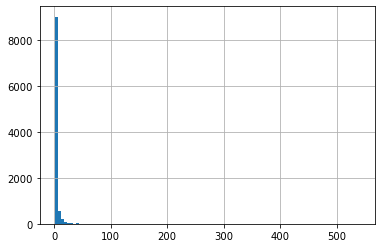

In [11]:

checkouts_list["checkouts"].hist(bins=100)

Das Histogram zu den Checkouts gibt nicht so richtig viel her. Man kann sehen, dass die meisten Titel selten ausgeliehen wurden, ganz wenige sehr häufig.

In [12]:
# .mean zeigt nun endlich den durschnittlichen Wert an.
checkouts_list["checkouts"].mean()

3.339

In [13]:
# .mean zeigt den Median an.
checkouts_list["checkouts"].median()

1.0

## Antwort zu Frage 1
Im Schnitt wurden Medien 3,3 Mal im Jahr 2018 ausgeliehen. Der Median liegt allterdings bei 1. Der höhere Durschnitt lässt sich durch die Ausreißer nach oben mit 540 Ausleihen erklären.

## Frage 2
Bei 540 Ausleihen drängt sich die Frage auf: Welches Medium wurde 540 Mal entliehen?

In [20]:
# Mit .idmax() wird die Zeile ausgegeben, in der in der Spalte checkouts der höchste Wert vorhanden ist.
checkouts_list.checkouts.idxmax()

6577

In [21]:
# .loc spricht die Location, die Zeile im Dataframe an.
print(checkouts_list.loc[[6577]])

     usageclass checkouttype materialtype  checkoutyear  checkoutmonth  \
6577   Physical      Horizon         BOOK          2018              1   

      checkouts                                              title  isbn  \
6577        540  In the midst of winter : a novel / Isabel Alle...   NaN   

              creator                                           subjects  \
6577  Allende, Isabel  College teachers Fiction, Women college teache...   

         publisher publicationyear  
6577  Atria Books,           2017.  


In [22]:
checkouts_list.loc[[6577]]

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
6577,Physical,Horizon,BOOK,2018,1,540,In the midst of winter : a novel / Isabel Alle...,NaN,"Allende, Isabel","College teachers Fiction, Women college teache...","Atria Books,",2017.


## Antwort Frage 2
[In the midst of winter](https://seattle.bibliocommons.com/v2/record/S30C3271806 "Find @ The Seattle Public Library") von Isabel Allende wurde 540 Mal entliehen. Der Link führt direkt zur entsprechenden Seite im Katalog der Seattle Public Library.